<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <h1 style= "font-family: bookman old style;
                font-size: 30px;">📈 Portland Crimes Analysis </h1>
    <br>
    <ul>
        <li style = "font-family: bookman old style">O dataset utilizado para esta análise está disponível para acesso e exploração <a href="https://www.kaggle.com/datasets/michaellindsay/portland-crime">kaggle</a>.</li>
    </ul>
    <br>
</div>

In [1]:
# Versão Python
from platform import python_version
print(f"Versão Python para este projeto: {python_version()}")

Versão Python para este projeto: 3.10.5


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Versão dos pacotes
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

numpy     : 1.23.1
pandas    : 2.0.3
seaborn   : 0.11.2
matplotlib: 3.5.2



<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
<h1 style = "font-family: bookman old style;
             font-size: 30px;
             padding-left: 17px;
             padding-top: 5px"> Carregando o Conjunto de Dados </h1>
    <br>
</div>

In [4]:
# Exibir todas as linhas
pd.set_option("display.max_rows", None)

In [5]:
df = pd.read_csv("data/Crimes.csv", sep="\t")
df.head(3)

,Unnamed: 0,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
0,491800,8800 BLOCK OF SE FLAVEL ST,23-171766,Property,Lents,2023-06-30,2100,Larceny Offenses,Theft From Motor Vehicle,45.468464,-122.572201,7670548.0,663706.0,2023-06-30,1
1,475141,800 BLOCK OF SW 4TH AVE,23-915199,Property,Downtown,2023-06-30,730,Larceny Offenses,Theft From Motor Vehicle,45.517507,-122.677045,7644142.0,682288.0,2023-06-30,1
2,475143,800 BLOCK OF SW 4TH AVE,23-915330,Property,Downtown,2023-06-30,1550,Vandalism,Vandalism,45.517507,-122.677045,7644142.0,682288.0,2023-06-30,1


<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
<h1 style = "font-family: bookman old style;
             font-size: 30px;
             padding-left: 17px;
             padding-top: 5px"> Análise Exploratória 🔍</h1>
    <br>
</div>

In [6]:
# Removendo a coluna "Unnamed: 0" pois ela era o índice no antigo dataset
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499915 entries, 0 to 499914
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Address          457678 non-null  object 
 1   CaseNumber       499915 non-null  object 
 2   CrimeAgainst     499915 non-null  object 
 3   Neighborhood     483451 non-null  object 
 4   OccurDate        499915 non-null  object 
 5   OccurTime        499915 non-null  int64  
 6   OffenseCategory  499915 non-null  object 
 7   OffenseType      499915 non-null  object 
 8   OpenDataLat      446531 non-null  float64
 9   OpenDataLon      446531 non-null  float64
 10  OpenDataX        446531 non-null  float64
 11  OpenDataY        446531 non-null  float64
 12  ReportDate       499915 non-null  object 
 13  OffenseCount     499915 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 53.4+ MB


In [8]:
# Existem valores duplicados?
print(f"Temos {df['CaseNumber'].duplicated().sum()} valores duplicados.")
print(f"O que representa {round(df['CaseNumber'].duplicated().sum() / len(df), 2)}% do nosso dataset.")

Temos 26165 valores duplicados.
O que representa 0.05% do nosso dataset.


In [9]:
# Verificando algumas linhas onde os registros são duplicados
df.loc[df["CaseNumber"].duplicated(), ["CaseNumber"]].head(10)

,CaseNumber
41,23-170756
166,23-170970
180,23-X5851697
206,23-X5851865
238,23-170284
250,23-170538
256,23-170693
257,23-170693
262,23-170488
307,23-169672


In [10]:
# Validando a tese
df.loc[df["CaseNumber"] == "23-X5851865", ["CaseNumber"]].count()

CaseNumber    2
dtype: int64

In [11]:
df.loc[df["CaseNumber"] == "23-170488", ["CaseNumber"]].count()

CaseNumber    2
dtype: int64

In [12]:
# Remover os registros duplicados
df.drop_duplicates(subset=["CaseNumber"], inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Shape
df.shape

(473750, 14)

In [15]:
# Valores Ausentes
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f"{col}: {df[col].isna().sum()} valores ausentes.")
        print(f"O que representa {round(df[col].isna().sum() / len(df), 2)}% de valores ausentes")
        print("-" * 25)

Address: 38517 valores ausentes.
O que representa 0.08% de valores ausentes
-------------------------
Neighborhood: 15414 valores ausentes.
O que representa 0.03% de valores ausentes
-------------------------
OpenDataLat: 48861 valores ausentes.
O que representa 0.1% de valores ausentes
-------------------------
OpenDataLon: 48861 valores ausentes.
O que representa 0.1% de valores ausentes
-------------------------
OpenDataX: 48861 valores ausentes.
O que representa 0.1% de valores ausentes
-------------------------
OpenDataY: 48861 valores ausentes.
O que representa 0.1% de valores ausentes
-------------------------


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px">
    <p style = "padding-left: 5px;
                padding-top: 18px"> <i>Address</i> tem 8% de valores ausentes enquanto <i>Neighborhood</i> tem apenas 3%, como já sabemos, onde não tem informações na variável <i>Neighborhood</i> significa que <b>provavelmente</b> o crime foi fora da jurisdição de Portland ou que o endereço <b>não consta no sistema</b>, vamos localizar todos os registros onde <i>Adress e Neighborhood</i> <b>são ausentes.</b> </p>
    <br>
</div>

In [16]:
# Criando a variável que irá receber o filtro onde Address e Neighborhood são nan
outside_boundaries = df.loc[(df["Address"].isna() & df["Neighborhood"].isna())].shape[0]

print(f"Temos {outside_boundaries} ocorrências fora da jurisdição de Portland (aparentemente).")
print(f"Isso representa {round(outside_boundaries / len(df), 3)}% de todo o conjunto de dados.")

Temos 1532 ocorrências fora da jurisdição de Portland (aparentemente).
Isso representa 0.003% de todo o conjunto de dados.


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <p style = "padding-left: 5px;
                padding-top: 18px"> Temos um percentual extremamente baixo de registros, como não há possibilidade de descobrir onde exatamente os crimes nessas regiões ocorreram, vamos simplesmente remover estes registros.</p>
    <br>
</div>

<p></p>

In [17]:
# Removendo os valores fora da jurisdição de Portland
index_to_drop = df[(df["Address"].isna()) & (df["Neighborhood"].isna())].index
df.drop(index_to_drop, inplace=True)

In [18]:
# Shape
df.shape

(472218, 14)

In [19]:
# Verificando valores ausentes
df.isna().sum()

Address            36985
CaseNumber             0
CrimeAgainst           0
Neighborhood       13882
OccurDate              0
OccurTime              0
OffenseCategory        0
OffenseType            0
OpenDataLat        47329
OpenDataLon        47329
OpenDataX          47329
OpenDataY          47329
ReportDate             0
OffenseCount           0
dtype: int64

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;
              padding-top: 10px;
              padding-left: 5px">
    <p>Agora que removemos os registros onde <b>Address e Neighborhood</b> são ausentes, ou seja, onde os crimes <b>provavelmente</b> ocorreram fora da jurisdição de Portland, temos algumas alternativas sobre a tratativa dos valores ausentes restantes:</p>
    <p style = "padding-left: 17px;"><b style = "color: #cc0000">1.</b> Remover os registros ausentes da variável Neighborhood, uma vez que ela representa um percentual baixo em relação a todo o conjunto de dados.</p>
    <br>
    <p style = "padding-left: 17px;"><b style = "color: #cc0000">2.</b> Remover todos os registros ausentes das variáveis Address e Neighborhood e consequentemente os registros de latitude e longitude.</p>
    <br>
    <p style = "padding-left: 17px;"><b style = "color: #cc0000">3.</b> Atribuir o valor <i>"NOT INFORMED"</i> onde os registros forem ausentes.</p>
    <br>
</div>

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <p style = "padding-left: 5px;
                padding-top: 15px">Optei pela primeira opção, seguida da terceira, como a representatividade de valores ausentes da variável <i>Neighborhood</i> é baixa, vou remover estes valores, e em seguida atribuir o valor <b>"NOT INFORMED"</b> na variável <i>Address</i>, pois é muito mais fácil ter a informação do bairro mas não ter a informação do endereço.</p>
    <br>
</div>

In [20]:
# Fazer uma imputação do índice das linhas onde a coluna Neighborhood é NaN
neighborhood_nan = df[df["Neighborhood"].isna()].index
df.drop(neighborhood_nan, inplace = True)

In [21]:
# Fazer uma imputação nas linhas onde a coluna Address é NaN 
# e atribuir o valor NOT INFORMED
address_nan = df[df["Address"].isna()].index
df["Address"][address_nan] = "NOT INFORMED" 

In [22]:
df[df["Address"] == "NOT INFORMED"].head(5)

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount
52,NOT INFORMED,23-X5852372,Person,Rose City Park,2023-06-30,2325,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,2023-06-30,1
55,NOT INFORMED,23-X5852364,Person,Centennial,2023-06-30,2200,Assault Offenses,Intimidation,NaN,NaN,NaN,NaN,2023-06-30,2
56,NOT INFORMED,23-X5852363,Person,Centennial,2023-06-30,2038,Assault Offenses,Intimidation,NaN,NaN,NaN,NaN,2023-06-30,1
78,NOT INFORMED,23-X5853802,Person,Arbor Lodge,2023-06-30,2230,Sex Offenses,Rape,NaN,NaN,NaN,NaN,2023-06-30,1
79,NOT INFORMED,23-X5851879,Person,East Columbia,2023-06-30,500,Assault Offenses,Simple Assault,NaN,NaN,NaN,NaN,2023-06-30,1


<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <h1 style = "font-family: bookman old style;
             font-size: 30px;
             padding-left: 17px"> Análise Descritiva </h1>
    <ul>
    <li style = "font-family: bookman old style;"><b style = "color: #cc0000;">Q1:</b> Quantas Categorias de Crimes Foram Registradas? </li>
    </ul>
    <br>
</div>

In [23]:
print(f"Temos {df['OffenseCategory'].nunique()} categorias de criminalidade.")

Temos 23 categorias de criminalidade.


<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <ul>
    <li style = "font-family: bookman old style;"><b style = "color: #cc0000;">Q2:</b> Qual é o top 10 de Crimes Mais Cometidos <b>por Categoria?</b> </li>
    </ul>
    <br>
</div>

In [24]:
# Contando os valores
top_10 = df["OffenseCategory"].value_counts().head(10)

# Forma alternativa usando agregação
# categories = df.groupby("OffenseCategory")["OffenseCategory"].count().sort_values(ascending = False)

In [25]:
top_10

OffenseCategory
Larceny Offenses          186155
Vandalism                  59564
Assault Offenses           58371
Motor Vehicle Theft        58050
Burglary                   36705
Fraud Offenses             23435
Drug/Narcotic Offenses      8881
Robbery                     8586
Weapon Law Violations       4190
Sex Offenses                4109
Name: count, dtype: int64

In [26]:
# Convertendo para um DataFrame
top_10_df = top_10.reset_index()

top_10_df.columns = ["OffenseCategory", "Count"]

In [27]:
top_10_df

,OffenseCategory,Count
0,Larceny Offenses,186155
1,Vandalism,59564
2,Assault Offenses,58371
3,Motor Vehicle Theft,58050
4,Burglary,36705
5,Fraud Offenses,23435
6,Drug/Narcotic Offenses,8881
7,Robbery,8586
8,Weapon Law Violations,4190
9,Sex Offenses,4109


In [28]:
# Cores para as barras do gráfico
gray = "#262626"

highest_color = ["#000066"]
for i in range(0, 9):
    highest_color.append(gray)

In [29]:
# Melhorar a qualidade do gráfico
%config InlineBackend.figure_format = "svg"

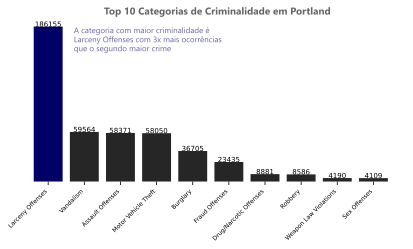

In [30]:
# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(7, 3))

# Criando um gráfico de barras
ax.bar(x=top_10_df["OffenseCategory"], height = top_10_df["Count"], color=highest_color)

# Rotacionando os labels do eixo x
plt.xticks(rotation = 45, ha="right", size = 6)

# Removendo os labels do eixo y
plt.yticks([])

# Rótulo de dados
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + 0.4, i.get_height()),
                ha = "center", color = "black", size = 7)

# Título
fig.text(y = 0.9,
         x = 0.3,
         s = "Top 10 Categorias de Criminalidade em Portland",
         fontdict = {"family": "Segoe UI",
                     "size": 10,
                     "weight": "bold"},
         alpha = 0.6)
    
# Insight
fig.text(y = 0.73,
         x = 0.24,
         s = "A categoria com maior criminalidade é\nLarceny Offenses com 3x mais ocorrências\nque o segundo maior crime",
         fontdict = {"family": "Segoe UI",
                     "size": 8,
                     "color": "#000066"},
         alpha = 0.6)

# Removendo as bordas
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Show
plt.show()

<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <ul>
    <li style = "font-family: bookman old style;"><b style = "color: #cc0000;">Q3:</b> Quantos Crimes por Categoria Foram Registrados <b>por Ano?</b> </li>
    </ul>
    <br>
</div>

In [31]:
# Para responder essa pergunta será necessário fazer uma
# engenharia de atributos nas colunas OccurDate e ReportDate

df.dtypes

Address             object
CaseNumber          object
CrimeAgainst        object
Neighborhood        object
OccurDate           object
OccurTime            int64
OffenseCategory     object
OffenseType         object
OpenDataLat        float64
OpenDataLon        float64
OpenDataX          float64
OpenDataY          float64
ReportDate          object
OffenseCount         int64
dtype: object

In [32]:
# Converter para o tipo date as colunas OccurDate e ReportDate
df["ReportDate"] = pd.to_datetime(df["ReportDate"])
df["OccurDate"] = pd.to_datetime(df["OccurDate"])

In [33]:
df.dtypes

Address                    object
CaseNumber                 object
CrimeAgainst               object
Neighborhood               object
OccurDate          datetime64[ns]
OccurTime                   int64
OffenseCategory            object
OffenseType                object
OpenDataLat               float64
OpenDataLon               float64
OpenDataX                 float64
OpenDataY                 float64
ReportDate         datetime64[ns]
OffenseCount                int64
dtype: object

In [34]:
# Fazendo uma agregação pelo ano de ReportDate e em seguida contando os registros
df.groupby(df["ReportDate"].dt.year)\
             ["OffenseCategory"].agg(["count"])

,count
ReportDate,
2015,33576
2016,51320
2017,54963
2018,55391
2019,54377
2020,55044
2021,59433
2022,64787
2023,29445


<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <h2 style = "color: #cc0000;
                 padding-left: 17px">Conclusão: </h2>
<ul>
    <li>De 2015 para 2016 o índice de criminalidade <b>quase duplicou</b> com o aumento de <b>65%</b>, depois o índice se manteve em um aumento de aproximadamente <b>2% ao ano.</b></li>
    <br>
    <li>Em 2018 o índice de criminalidade <b>foi maior</b> do que nos dois anos subsequentes.</li>
</ul>
</div>

<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <ul>
    <li style = "font-family: bookman old style;"><b style = "color: #cc0000;">Q4:</b> Quais Foram os 3 Crimes Mais Registrados por Ano ao <b>Longo do Tempo?</b> </li>
    </ul>
    <br>
</div>

In [35]:
# Fazendo uma agregação pelo ano de ReportDate 
# contando os registros de OffenseCategory
categories = df.groupby([df["ReportDate"].dt.year, "OffenseCategory"])\
                        ["OffenseCategory"].agg(["count"])\
                        .sort_values(by = ["ReportDate", "count"],
                                     ascending = False)
                        
categories

count
ReportDate OffenseCategory                    
2023       Larceny Offenses              10230
           Vandalism                      5478
           Motor Vehicle Theft            4435
           Assault Offenses               3674
           Burglary                       2541
           Fraud Offenses                 1264
           Robbery                         627
           Weapon Law Violations           327
           Drug/Narcotic Offenses          211
           Sex Offenses                    208
           Arson                           123
           Counterfeiting/Forgery          121
           Prostitution Offenses            38
           Homicide Offenses                32
           Embezzlement                     29
           Kidnapping/Abduction             24
           Pornography/Obscene Material     23
           Stolen Property Offenses         17
           Animal Cruelty Offenses          16
           Extortion/Blackmail              16
           Human Trafficking Offenses        9
           Bribery                           2
2022       Larceny Offenses              23468
           Vandalism                     11247
           Motor Vehicle Theft           10586
           Assault Offenses               7421
           Burglary                       5642
           Fraud Offenses                 2566
           Robbery                        1340
           Weapon Law Violations           662
           Sex Offenses                    461
           Drug/Narcotic Offenses          392
           Arson                           331
           Counterfeiting/Forgery          273
           Homicide Offenses                73
           Prostitution Offenses            63
           Kidnapping/Abduction             62
           Pornography/Obscene Material     55
           Embezzlement                     42
           Stolen Property Offenses         42
           Extortion/Blackmail              23
           Animal Cruelty Offenses          20
           Human Trafficking Offenses       16
           Bribery                           2
2021       Larceny Offenses              22724
           Motor Vehicle Theft            8867
           Vandalism                      8864
           Assault Offenses               7687
           Burglary                       4819
           Fraud Offenses                 2831
           Robbery                        1163
           Weapon Law Violations           602
           Sex Offenses                    459
           Arson                           443
           Counterfeiting/Forgery          263
           Drug/Narcotic Offenses          258
           Prostitution Offenses           110
           Homicide Offenses                58
           Kidnapping/Abduction             55
           Pornography/Obscene Material     53
           Stolen Property Offenses         51
           Embezzlement                     46
           Extortion/Blackmail              36
           Animal Cruelty Offenses          28
           Human Trafficking Offenses       16
2020       Larceny Offenses              21752
           Vandalism                      7693
           Assault Offenses               7132
           Motor Vehicle Theft            6320
           Burglary                       5234
           Fraud Offenses                 2977
           Robbery                         953
           Drug/Narcotic Offenses          760
           Weapon Law Violations           599
           Arson                           461
           Sex Offenses                    411
           Counterfeiting/Forgery          406
           Embezzlement                     75
           Pornography/Obscene Material     74
           Homicide Offenses                41
           Kidnapping/Abduction             40
           Stolen Property Offenses         39
           Prostitution Offenses            23
           Animal Cruelty Offenses          22

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <h2 style = "padding-left: 16px;
                 color: #cc0000;">Conclusão: </h2>
    <ul>
        <li>Os crimes mais registrados sempre são <b>Larceny Offenses, Vandalism, Motor Vehicle Theft e Assault Offenses.</b></li>
        <br>
        <li>Em <b>todos os anos</b> o crime mais registrado foi <b>Larceny Offenses</b> com pelo menos <b>20 mil ocorrências</b> (<i>com exceção de 2015 com 15 mil e 2023 que é o ano vigente</i>).</li>
    </ul>
</div>

<div style = "border: solid;
              border-radius: 5px 20px;
              border-color: #000066;">
    <br>
    <ul>
    <li style = "font-family: bookman old style;"><b style = "color: #cc0000;">Q5:</b> Quantos Crimes Foram Registrados por <b>Property, Person, Society?</b></li>
    </ul>
    <br>
</div>

In [36]:
# Contando o número de ocorrências por CrimeAgainst
crime_against = df["CrimeAgainst"].value_counts()
crime_against.name = "Crime Against"
crime_against

CrimeAgainst
Property    380439
Person       63260
Society      14637
Name: Crime Against, dtype: int64

In [37]:
crime_against.reset_index

crime_against.columns = ["CrimeAgainst", "Count"]

In [38]:
# Definindo os eixos x e y
x = crime_against.values
y = crime_against.index

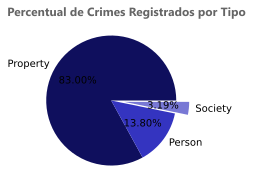

In [39]:
# Criando figura e eixo
ax, fig = plt.subplots(figsize=(6, 3))

# Gráfico de pizza
ax = plt.pie(x = x, labels = y,autopct="%.2f%%",
             explode = [0, 0, 0.2], colors = ["#0f0f5d",
                                              "#3434c0",
                                              "#7878d5"])

# Título
fig.text(y = 1.3,
         x = -1.6,
         s = "Percentual de Crimes Registrados por Tipo",
         fontdict = {"family": "Segoe UI",
                     "size": 12,
                     "weight": "bold"},
         alpha = 0.6)


# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-color: #000066;
              border-radius: 5px 20px">
    <h2 style = "padding-left: 16px;
                 color: #cc0000">Conclusão:</h2>
<ul>
    <li>Crimes contra a propriedade representam mais de <b>80%</b> de todo o conjunto de dados.</li>
</ul>
</div>
<hr>

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <ul>
        <li><b style = "color: #cc0000">Q6: </b>Quais Foram os 10 Bairros que Tiveram Mais Ocorrências?</p></li>
    </ul>
    <br>
</div>

In [40]:
neighborhood = df["Neighborhood"].value_counts().head(10)
neighborhood

Neighborhood
Downtown               33406
Hazelwood              28799
Northwest              16938
Lents                  16518
Powellhurst-Gilbert    15879
Centennial             14104
Pearl                  13736
Old Town/Chinatown     12440
Montavilla             11835
Lloyd                  10707
Name: count, dtype: int64

In [41]:
# Definindo os eixos X e Y
y = neighborhood.index
x = neighborhood.values

In [42]:
# Paleta de cores para as barras
colors = ["#00004c", "#00004c"]

for i in range(0, 4):
    colors.append("#1919ff")
for j in range(0, 4):
    colors.append("#9999ff")

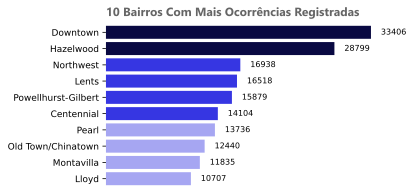

In [43]:
# Criando o eixo e a figura do gráfico
ax, fig = plt.subplots(figsize=(5, 3))

# Gráfico de barras
ax = sns.barplot(x=x, y=y, orient="h", palette=colors)

# Removendo os labels
plt.ylabel("")
plt.yticks(size = 9)
plt.xticks([])

# Título
fig.text(y = -1,
         x = 3,
         s = "10 Bairros Com Mais Ocorrências Registradas",
         fontdict = {"family": "Segoe UI",
                     "size": 12,
                     "weight": "bold"},
         alpha = 0.6)

# Adicionando rótulos de dados usando annotate()
for i, v in enumerate(x):
    ax.annotate(str(v), xy=(v, i), xytext=(10, 0), textcoords='offset points', va='center', fontsize=8)

# Removendo as bordas
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
  
# Show
plt.show()

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <ul>
        <li><b style = "color: #cc0000">Q7: </b> Quais Foram os Bairros que Tiveram <b>Mais de 2 mil Ocorrências</b> ao longo do tempo?</p></li>
    </ul>
    <br>
</div>

In [44]:
# Fazendo agragação pelo ano de OccurDate e contando os valores
crimes_neighborhood = df.groupby([df["OccurDate"].dt.year,
            "Neighborhood"])["CrimeAgainst"].agg(["count"]).sort_values(by = ["OccurDate",
                                                                            "count"],
                                                                      ascending = False)

In [45]:
# Filtrando somente os valores onde "count" for maior que 2 mil
highest_crimes = crimes_neighborhood.loc[crimes_neighborhood["count"] > 2000]
highest_crimes

count
OccurDate Neighborhood              
2023      Downtown              2893
2022      Downtown              5149
          Hazelwood             3451
          Northwest             2800
          Pearl                 2111
2021      Downtown              3968
          Hazelwood             3407
          Northwest             2546
          Lents                 2023
2020      Downtown              3971
          Hazelwood             3220
          Northwest             2211
          Powellhurst-Gilbert   2021
2019      Downtown              3894
          Hazelwood             3753
          Lents                 2051
          Powellhurst-Gilbert   2048
2018      Downtown              3738
          Hazelwood             3658
          Lents                 2255
          Powellhurst-Gilbert   2206
2017      Downtown              3762
          Hazelwood             3542
          Lents                 2098
          Powellhurst-Gilbert   2007
2016      Hazelwood             3627
          Downtown              3611
          Lents                 2043
2015      Hazelwood             2422
          Downtown              2420

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <h2 style = "color: #cc0000;
                 padding-left: 17px">Conclusão: </h2>
<ul>
    <li>O Centro (downtown) é a região onde são registrados o maior número de ocorrências.</li>
    <br>
    <li>Em <b>todos os anos</b> as regiões Downtown e Hazelwood são as primeiras em relação ao número de ocorrências registrados.</li>
</ul>
</div>
<hr>

<div style = "font-family: bookman old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066">
    <br>
    <ul>
        <li><b style = "color: #cc0000">Q8: </b> Quantos Crimes foram Registrados por Hora?</p></li>
    <br>
    <li><i>Para responder a essa pergunta será necessário fazer uma engenharia de atributos na coluna <b>OccurTime</b>, criando duas novas colunas que serão atribuidas os valores de hora e minuto.</i></li>
    </ul>
</div>

In [46]:
# Extraindo as horas e os minutos da coluna OccurTime
# e adicionando em novas colunas
df["OccurHour"] = df["OccurTime"] // 100
df["OccurMinute"] = df["OccurTime"] % 100

In [47]:
# Contando os registros por hora
df["OccurHour"].value_counts()

OccurHour
0     28851
17    25985
12    25872
18    25698
22    25697
20    23942
19    23400
21    23035
16    22105
23    21286
15    20995
14    19516
13    19085
11    17793
10    17737
8     17379
9     16384
1     15424
2     13337
7     12613
3     11883
4     10393
6     10253
5      9673
Name: count, dtype: int64

<div style = "font-family: bookmand old style;
              border: solid;
              border-radius: 5px 20px;
              border-color: #000066;">
    <ul>
        <li>Aparentemente o horário que teve mais ocorrências registradas foi meia noite (0), no entanto é necessário validar essa informação.</li>
    </ul>
</div>

In [48]:
# Verficando os registros onde a hora se inicia com 0
df[df["OccurTime"].astype(str).str.startswith("0")].head(5)

,Address,CaseNumber,CrimeAgainst,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseType,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,ReportDate,OffenseCount,OccurHour,OccurMinute
22,9200 BLOCK OF N CENTRAL ST,23-171605,Property,St Johns,2023-06-30,0,Larceny Offenses,All Other Larceny,45.594772,-122.756318,7624617.0,711006.0,2023-06-30,1,0,0
34,5700 BLOCK OF SE INSLEY ST,23-915315,Property,Woodstock,2023-06-30,0,Larceny Offenses,Theft From Motor Vehicle,45.483906,-122.604279,7662468.0,669547.0,2023-06-30,1,0,0
48,3600 BLOCK OF SE CENTER ST,23-171796,Property,Creston-Kenilworth,2023-06-30,0,Burglary,Burglary,45.494021,-122.625645,7657087.0,673377.0,2023-06-30,1,0,0
49,3400 BLOCK OF SE 128TH AVE,23-171467,Property,Powellhurst-Gilbert,2023-06-30,0,Motor Vehicle Theft,Motor Vehicle Theft,45.497132,-122.531820,7681167.0,673892.0,2023-06-30,1,0,0
72,500 BLOCK OF SE BELMONT ST,23-171536,Property,Buckman West,2023-06-30,0,Motor Vehicle Theft,Motor Vehicle Theft,45.516474,-122.660243,7648437.0,681796.0,2023-06-30,1,0,0


<p>A situação é bastante atípica, já que nenhum registro contém informações sobre os minutos. Embora haja a possibilidade de vários crimes terem sido registrados exatamente às 00:00, essa situação é muito improvável de ocorrer com frequência. É importante destacar que a ausência de informações sobre os minutos nos registros de hora pode impactar negativamente a análise caso não seja tratada corretamente. Portando damos a nossa análise por encerrada.</p>

<h3>Conclusões Finais:</h3>
<ul>
    <li><b>Tendência de Crescimento Inicial:</b> A observação de quase duplicação do índice de criminalidade de 2015 para 2016, seguida de um aumento mais constante em torno de 2% ao ano, aponta para uma <b>mudança significativa</b> no cenário da criminalidade nesse período.</li>
    <br>
    <li><b>Variação em 2018:</b> O aumento incomum do índice de criminalidade em 2018 em comparação aos anos subsequentes, embora não seja tão significante pode sugerir a ocorrência de eventos ou fatores especiais nesse ano que influenciaram o comportamento criminal.</li>
    <br>
    <li><b>Domínio de Categorias de Crime:</b> As categorias de crime mais frequentes, como <i>Larceny Offenses, Vandalism, Motor Vehicle Theft e Assault Offenses</i>, destacam as áreas nas quais os esforços de prevenção e intervenção <b>podem ser concentrados</b> para abordar eficazmente a criminalidade.</li>
    <br>
    <li><b>Predominância de Larceny Offenses:</b> A constante presença da categoria Larceny Offenses como um dos crimes mais registrados em todos os anos, sugere que é uma preocupação constante para as autoridades de segurança pública.</li>
    <br>
    <li><b>Natureza dos Crimes:</b> O fato de crimes contra a propriedade representarem <b>mais de 80%</b> do conjunto de dados indica a importância de medidas voltadas para a proteção e segurança da propriedade.</li>
    <br>
    <li><b>Padrões Geográficos:</b> A concentração de ocorrências na região do Centro (<i>downtown</i>) reforça a necessidade de estratégias específicas de policiamento e segurança nessa área.</li>
    <br>
    <li><b>Persistência de Regiões:</b> A consistência das regiões <i>Downtown e Hazelwood</i> como as primeiras em termos de ocorrências em todos os anos sugere que essas áreas requerem <b>atenção especializada</b> em termos de prevenção e repressão ao crime.</li>
</ul>

<h1>Fim</h1>